# Section 16.7

In [2]:
# from tensorflow.keras.datasets import mnist

In [3]:
from keras.datasets import mnist

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
y_train.shape

(60000,)

In [7]:
X_test.shape

(10000, 28, 28)

In [8]:
y_test.shape

(10000,)

In [9]:
%matplotlib inline

In [10]:
import matplotlib.pyplot as plt

In [11]:
import seaborn as sns

In [12]:
sns.set(font_scale=2)

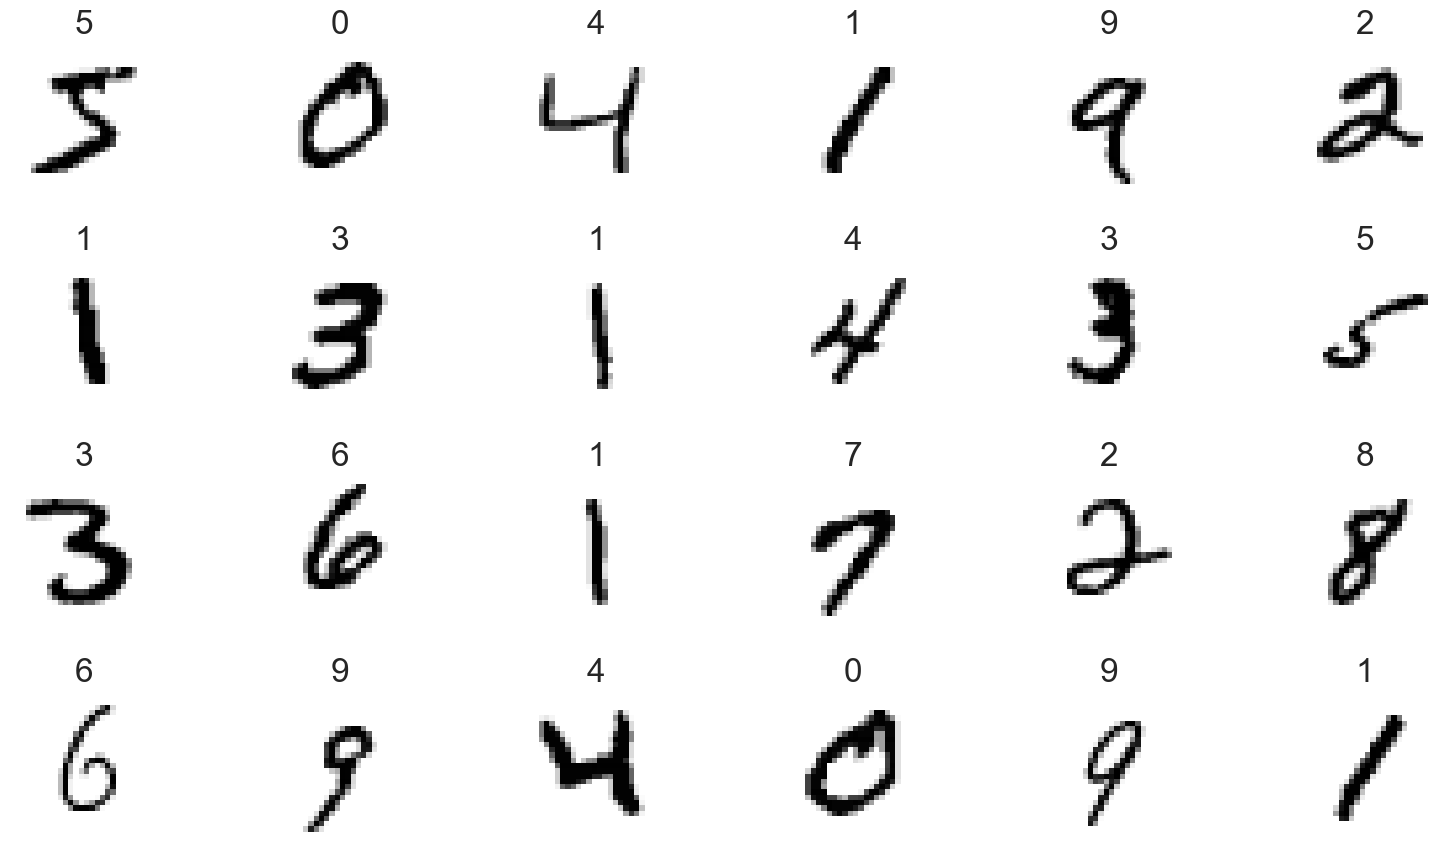

In [13]:
import numpy as np
index = np.random.choice(np.arange(len(X_train)), 24, replace=False)
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 9))

for item in zip(axes.ravel(), X_train, y_train):
    axes, image, target = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])  # remove x-axis tick marks
    axes.set_yticks([])  # remove y-axis tick marks
    axes.set_title(target)
plt.tight_layout()

In [14]:
X_train = X_train.reshape((60000, 28, 28, 1)) 

In [15]:
X_train.shape

(60000, 28, 28, 1)

In [16]:
X_train = X_train.astype('float32') / 255

In [17]:
X_test = X_test.reshape((10000, 28, 28, 1))

In [18]:
X_test.shape

(10000, 28, 28, 1)

In [19]:
X_test = X_test.astype('float32') / 255

In [20]:
from tensorflow.keras.utils import to_categorical

In [21]:
y_train = to_categorical(y_train)

In [22]:
y_train.shape

(60000, 10)

In [23]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [24]:
y_test = to_categorical(y_test)

In [25]:
y_test.shape

(10000, 10)

In [26]:
from tensorflow.keras.models import Sequential

In [27]:
cnn = Sequential()

In [28]:
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D

In [29]:
cnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', 
               input_shape=(28, 28, 1)))

In [30]:
cnn.add(MaxPooling2D(pool_size=(2, 2)))

In [31]:
cnn.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))

In [32]:
cnn.add(MaxPooling2D(pool_size=(2, 2)))

In [33]:
cnn.add(Flatten())

In [34]:
cnn.add(Dense(units=128, activation='relu'))

In [35]:
cnn.add(Dense(units=10, activation='softmax'))

In [36]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 128)         0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 3200)              0         
                                                                 
 dense (Dense)               (None, 128)               4

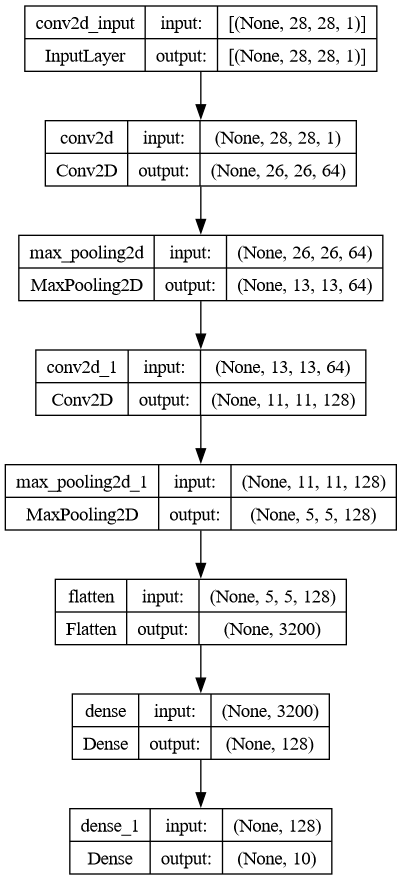

In [37]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(cnn, to_file='convnet.png', show_shapes=True, 
           show_layer_names=True)
Image(filename='convnet.png') 

In [38]:
cnn.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

In [39]:
cnn.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

Epoch 1/5


844/844 [==============================] - 30s 34ms/step - loss: 0.1450 - accuracy: 0.9560 - val_loss: 0.0570 - val_accuracy: 0.9828
Epoch 2/5
844/844 [==============================] - 26s 31ms/step - loss: 0.0437 - accuracy: 0.9859 - val_loss: 0.0355 - val_accuracy: 0.9897
Epoch 3/5
844/844 [==============================] - 26s 30ms/step - loss: 0.0281 - accuracy: 0.9910 - val_loss: 0.0352 - val_accuracy: 0.9907
Epoch 4/5
844/844 [==============================] - 26s 31ms/step - loss: 0.0200 - accuracy: 0.9936 - val_loss: 0.0403 - val_accuracy: 0.9903
Epoch 5/5
844/844 [==============================] - 26s 30ms/step - loss: 0.0153 - accuracy: 0.9951 - val_loss: 0.0455 - val_accuracy: 0.9873


In [40]:
loss, accuracy = cnn.evaluate(X_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.0517 - accuracy: 0.9844


In [41]:
loss

0.05170035362243652

In [42]:
accuracy

0.9843999743461609

In [43]:
predictions = cnn.predict(X_test)

313/313 [==============================] - 2s 7ms/step


In [44]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [45]:
for index, probability in enumerate(predictions[0]):
    print(f'{index}: {probability:.10%}')

0: 0.0000040866%
1: 0.0000023564%
2: 0.0074813877%
3: 0.0001715138%
4: 0.0000000026%
5: 0.0000000202%
6: 0.0000000000%
7: 99.9922990799%
8: 0.0000072068%
9: 0.0000286000%


In [46]:
images = X_test.reshape((10000, 28, 28))
incorrect_predictions = []

for i, (p, e) in enumerate(zip(predictions, y_test)):
    predicted, expected = np.argmax(p), np.argmax(e)
    
    if predicted != expected:
        incorrect_predictions.append((i, images[i], predicted, expected))

In [47]:
len(incorrect_predictions)

156

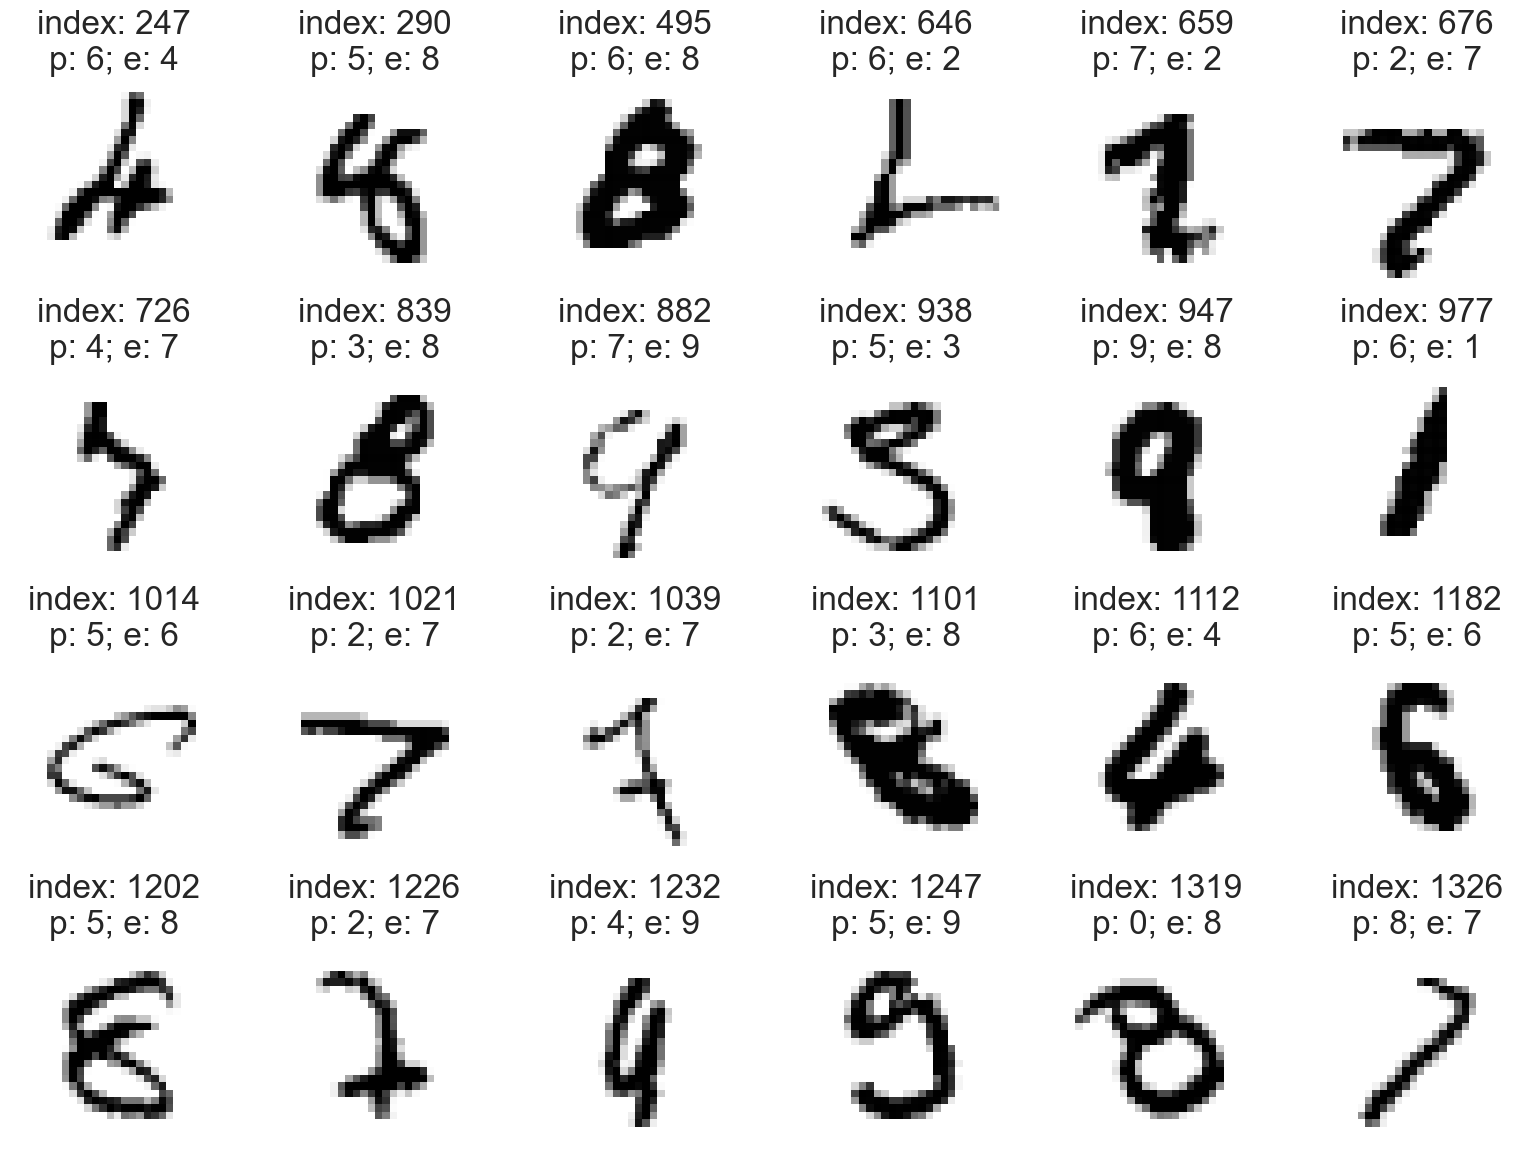

In [48]:
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 12))

for axes, item in zip(axes.ravel(), incorrect_predictions):
    index, image, predicted, expected = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])  # remove x-axis tick marks
    axes.set_yticks([])  # remove y-axis tick marks
    axes.set_title(f'index: {index}\np: {predicted}; e: {expected}')
plt.tight_layout()

In [49]:
def display_probabilities(prediction):
    for index, probability in enumerate(prediction):
        print(f'{index}: {probability:.10%}')

In [50]:
display_probabilities(predictions[495])

0: 22.4566698074%
1: 0.0000082311%
2: 0.0256526313%
3: 4.6919602901%
4: 0.0024647728%
5: 1.6942322254%
6: 49.4339913130%
7: 0.0000000253%
8: 21.6880068183%
9: 0.0070155140%


In [51]:
display_probabilities(predictions[583])

0: 0.0000047158%
1: 0.0000100330%
2: 79.2510747910%
3: 0.0403955346%
4: 0.0000016438%
5: 0.0000000080%
6: 0.0000000000%
7: 20.6430852413%
8: 0.0654222036%
9: 0.0000009733%


In [52]:
display_probabilities(predictions[625])

0: 0.0076819728%
1: 0.0001841420%
2: 0.0049300870%
3: 0.0000001397%
4: 2.1600499749%
5: 0.0000039838%
6: 97.8268325329%
7: 0.0000000007%
8: 0.0000283341%
9: 0.0002809265%


In [53]:
cnn.save('mnist_cnn.h5')

e:\anaconda3\envs\aida2158a\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
##########################################################################
# (C) Copyright 2019 by Deitel & Associates, Inc. and                    #
# Pearson Education, Inc. All Rights Reserved.                           #
#                                                                        #
# DISCLAIMER: The authors and publisher of this book have used their     #
# best efforts in preparing the book. These efforts include the          #
# development, research, and testing of the theories and programs        #
# to determine their effectiveness. The authors and publisher make       #
# no warranty of any kind, expressed or implied, with regard to these    #
# programs or to the documentation contained in these books. The authors #
# and publisher shall not be liable in any event for incidental or       #
# consequential damages in connection with, or arising out of, the       #
# furnishing, performance, or use of these programs.                     #
##########################################################################